4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import prep
from scipy import stats


# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

# filter out warnings
import warnings
warnings.filterwarnings('ignore')

# our own acquire script:
import acquire 


In [ ]:
4. #Print first 3 rows of dataset
iris = sns.load_dataset('iris') 

iris = data('iris')

print(iris.head(3))

In [ ]:
#Print the number of rows and columns of the data set
iris.shape

In [ ]:
#Print the data type of each column and the names
iris.info()

In [ ]:
#Print the summary statistics for each of the numeric variables
iris.describe()

In [ ]:
#Print the print the unique values for each of your categorical variables
iris.Species.unique()


In [ ]:
#5.Print the first 3 rows 

import pandas as pd

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head(3)

In [ ]:
#print the number of rows and columns

df_google.shape

In [ ]:
#print the column data type and names

df_google.info()

In [ ]:
#print the summary statistics for each of the numeric variables
df_google.describe()


In [ ]:
# print the unique values for each of your categorical variables


In [ ]:
df_google.Sex.unique()

In [ ]:
df_google.Embarked.unique()

In [ ]:
#6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

df_excel = pd.read_excel('train.xlsx')
df_excel

In [ ]:
#assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.iloc[:100]
df_excel_sample


In [ ]:
#print the number of rows of your original dataframe

df_excel.shape[0]

In [ ]:
#print the first 5 column names

df_excel.columns[:5]


In [ ]:
#print the column names that have a data type of object
df_excel.info()

In [ ]:
#print the column names that have a data type of object

df_excel[['Name','Sex','Ticket','Cabin','Embarked']]



In [ ]:
#print the column names that have a data type of object

df_excel.select_dtypes(include='object').head()


In [ ]:
#compute the range for each of the numeric variables.

titanic_stats = df_excel[['Age', 'Fare']].describe().T
titanic_stats


In [ ]:
#compute the range for each of the numeric variables.

titanic_stats['range'] = titanic_stats['max'] - titanic_stats['min']
titanic_stats

# Data Preparation Exercises 

In [ ]:
# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

In [ ]:
df_iris = acquire.new_iris_data()
df_iris

In [ ]:
#2. 
columns_to_drop = ['species_id']

In [ ]:
columns_to_drop

In [ ]:
df_iris = df_iris.drop(columns = columns_to_drop) 

In [ ]:
#3.
df_iris.rename(columns={'species_name':'species'}, inplace = True)

df_iris

In [ ]:
4. #Encoding variables, Dummy variables 
dummy_df = pd.get_dummies(df_iris[['species']], dummy_na=False, drop_first=[True])

dummy_df

In [ ]:
#concatenate

df_iris = pd.concat([df_iris, dummy_df], axis=1)
df_iris

In [ ]:
#5. 
def prep_iris_data(df):
    '''
    Takes in a iris dataframe and returns a cleaned dataframe
    Arguments: df - a pandas dataframe with the expected feature names and columns
    Return: prep_df - a dataframe with the cleaning operations performed on it
    '''
    
    #rename species name to species 
    df.rename(columns={'species_name':'species'}, inplace = True)
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    # Drop columns 
    columns_to_drop = ['species_id']
    df = df.drop(columns = columns_to_drop)
    # encoded categorical variables(changed these categorical variables to numerical values for ML)
    dummy_df = pd.get_dummies(df[['species']], dummy_na=False, drop_first=[True])
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [ ]:
df = acquire.new_iris_data()

prep_iris_data(df)


# Titanic dataset 

In [ ]:
#1. Use the function defined in acquire.py to load the Titanic data.

titanic = acquire.new_titanic_data()
titanic



In [ ]:
# 2. Drop any unnecessary, unhelpful, or duplicated columns.
titanic = titanic.drop(columns=['embarked','class', 'age','deck'])
titanic.head()

In [ ]:
#3. Encode the categorical columns. 
#Create dummy variables of the categorical columns and concatenate them onto the dataframe.

dummy_df = pd.get_dummies(data=titanic[['sex','embark_town']], drop_first=True)
dummy_df.head()

In [ ]:
titanic = pd.concat([titanic, dummy_df], axis=1)
titanic.head()

In [ ]:
#4. Create a function named prep_titanic that accepts the raw titanic data, 
#and returns the data with the transformations above applied.

def prep_titanic(titanic):
    titanic = titanic.drop(columns=['embarked','class', 'age','deck'])
    dummy_df = pd.get_dummies(data=titanic[['sex','embark_town']], drop_first=True)
    titanic = pd.concat([titanic, dummy_df], axis=1)
    
    return titanic

In [ ]:
df = acquire.get_titanic_data()

df.head()

# Telco dataset

In [ ]:
#1 Use the function defined in acquire.py to load the Telco data.



telco = acquire.new_telco_data()

telco

In [ ]:
#Make data look better 
telco.head().T

In [ ]:
#2.Drop any unnecessary, unhelpful, or duplicated columns. 
#This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [ ]:
pd.crosstab(telco.payment_type, telco.payment_type_id)

In [ ]:
pd.crosstab(telco.contract_type_id, telco.contract_type)


In [ ]:
pd.crosstab(telco.internet_service_type, telco.internet_service_type_id)


In [ ]:
telco = telco.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])
telco.head()

In [ ]:
telco.info()


In [ ]:
#Drop any unnecessary, unhelpful, or duplicated columns. 
#This could mean dropping foreign key columns but
#keeping the corresponding string values, 
#for example.

for col in telco.columns:
    print(telco[col].value_counts())
    print()

In [ ]:
#3. Encode the categorical columns. 
#Create dummy variables of the categorical columns and concatenate them onto the dataframe.

telco.gender.map({'Female':1, 'Male':0})

In [ ]:
# encode binary categorical variables into numeric values
telco['gender_encoded'] = telco.gender.map({'Female': 1, 'Male': 0})

telco['partner_encoded'] = telco.partner.map({'Yes': 1, 'No': 0})

telco['dependents_encoded'] = telco.dependents.map({'Yes': 1, 'No': 0})

telco['phone_service_encoded'] = telco.phone_service.map({'Yes': 1, 'No': 0})

telco['paperless_billing_encoded'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})

telco['churn_encoded'] = telco.churn.map({'Yes': 1, 'No': 0})

In [ ]:
telco.head()

In [ ]:
dummy_df = pd.get_dummies(telco[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type',\
                                 'churn'
                            ]],
                              drop_first=True)
dummy_df.head()

In [ ]:
telco = pd.concat( [telco, dummy_df], axis=1 )
telco.head()

In [ ]:
#4. Create a function named prep_telco that accepts the raw telco data, 
#and returns the data with the transformations above applied.

def prep_telco(telco):
    telco = telco.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])

    telco['gender_encoded'] = telco.gender.map({'Female': 1, 'Male': 0})
    telco['partner_encoded'] = telco.partner.map({'Yes': 1, 'No': 0})
    telco['dependents_encoded'] = telco.dependents.map({'Yes': 1, 'No': 0})
    telco['phone_service_encoded'] = telco.phone_service.map({'Yes': 1, 'No': 0})
    telco['paperless_billing_encoded'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
    telco['churn_encoded'] = telco.churn.map({'Yes': 1, 'No': 0})
    
    dummy_df = pd.get_dummies(telco[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type'
                            ]],
                              drop_first=True)
    telco = pd.concat( [telco, dummy_df], axis=1 )
    
    return telco

In [ ]:
df = acquire.get_telco_data()

df.head()

# Split Data

In [ ]:
#1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

def my_train_test_split(df, target):
    
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train[target])
    
    return train, validate, test

In [ ]:
df_iris.head()

In [ ]:
target = 'species'


In [ ]:
#2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

train_iris, validate_iris, test_iris = my_train_test_split(df_iris, target)

print(f'Prepared df: {df_iris.shape}')
print()
print(f'Train: {train_iris.shape}')
print(f'Validate: {validate_iris.shape}')
print(f'Test: {test_iris.shape}')


In [ ]:
#3. Run the function on the Titanic dataset, returning 3 datasets, train_telco, validate_telco and test_telco.
titanic.head()


In [ ]:
target = 'survived'


In [ ]:
train_titanic, validate_titanic, test_titanic = my_train_test_split(titanic, target)


In [ ]:
print(f'Prepared df: {titanic.shape}')
print()
print(f'Train: {train_titanic.shape}')
print(f'Validate: {validate_titanic.shape}')
print(f'Test: {test_titanic.shape}')

In [ ]:
#4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

telco.head()

In [ ]:
target = 'churn'


In [ ]:
train_telco, validate_telco, test_telco = my_train_test_split(telco, target)


In [ ]:
print(f'Prepared df: {telco.shape}')
print()
print(f'Train: {train_telco.shape}')
print(f'Validate: {validate_telco.shape}')
print(f'Test: {test_telco.shape}')

# Exploratory Analysis Exercises



In [2]:
#1 Acquire, prepare & split your data.

df = acquire.new_iris_data()

train, validate, test = prep.prep_iris(df)

In [3]:
train.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width
79,versicolor,5.7,2.6,3.5,1.0
36,setosa,5.5,3.5,1.3,0.2


2. Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

In [ ]:
#descriptive statistics

train.describe()

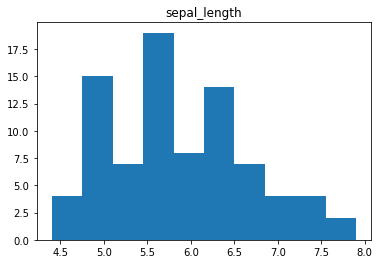

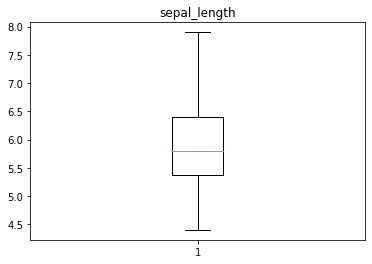

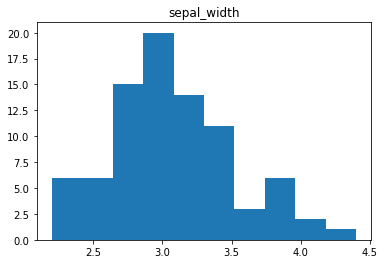

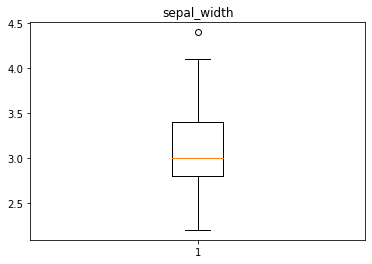

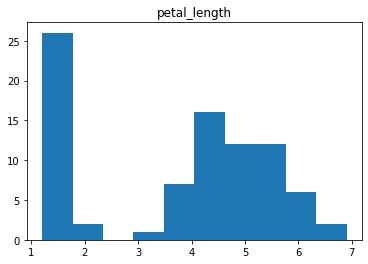

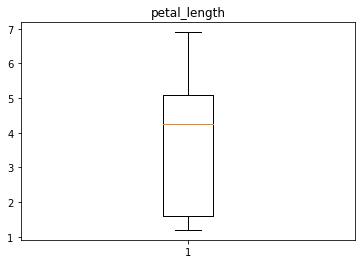

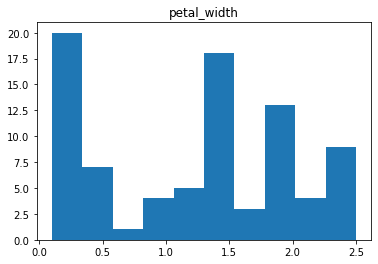

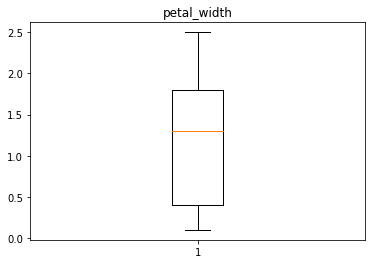

In [4]:
#quantitative variable visuals (sepal_length, sepal_width, petal_length, petal_width)

num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()


In [5]:
train.species.value_counts()


versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

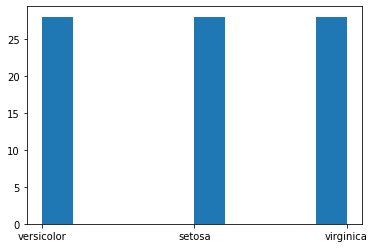

In [6]:
plt.hist(train.species)


#Document takeaways & any actions.
There are an equal amount of species. 
Most species sepal lengths are 4.5 to 6.5 cm 
most species sepal width is 2.6 to 3.5 cm 
most species petal length is between 3 and 7 cm
Most specicies pedal width is between 1 and 2.5 cm


# Bivariate Stats



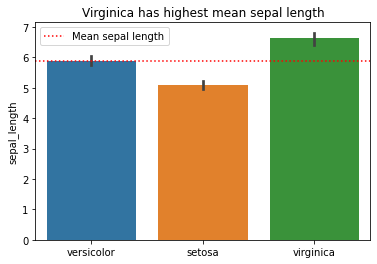

In [7]:
plt.title("Virginica has highest mean sepal length")
sns.barplot(x="species", y="sepal_length", data=train)
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length, label="Mean sepal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

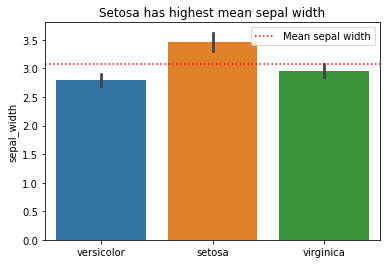

In [8]:
plt.title("Setosa has highest mean sepal width")
sns.barplot(x="species", y="sepal_width", data=train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Mean sepal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

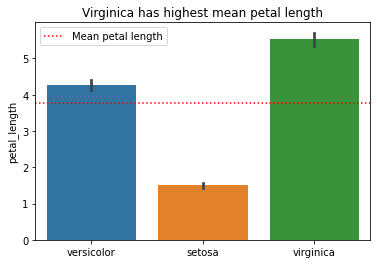

In [9]:
plt.title("Virginica has highest mean petal length")
sns.barplot(x="species", y="petal_length", data=train)
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean petal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

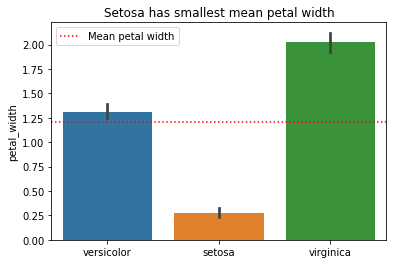

In [10]:
plt.title("Setosa has smallest mean petal width")
sns.barplot(x="species", y="petal_width", data=train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean petal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

In [11]:
# Virginica descriptive statistics
virginica_describe_sl = pd.DataFrame(train[train.species == 'virginica'].sepal_length.describe())
virginica_describe_sw = pd.DataFrame(train[train.species == 'virginica'].sepal_width.describe())
virginica_describe_pl = pd.DataFrame(train[train.species == 'virginica'].petal_length.describe())
virginica_describe_pw = pd.DataFrame(train[train.species == 'virginica'].petal_width.describe())

virginica_describe = pd.concat([virginica_describe_sl, virginica_describe_sw], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pl], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pw], axis=1)
virginica_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.625000,2.960714,5.535714,2.021429
std,0.532378,0.318956,0.496815,0.293582
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.450000,3.000000,5.500000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [13]:
# Setosa descriptive statistics
setosa_describe_sl = pd.DataFrame(train[train.species == 'setosa'].sepal_length.describe())
setosa_describe_sw = pd.DataFrame(train[train.species == 'setosa'].sepal_width.describe())
setosa_describe_pl = pd.DataFrame(train[train.species == 'setosa'].petal_length.describe())
setosa_describe_pw = pd.DataFrame(train[train.species == 'setosa'].petal_width.describe())

setosa_describe = pd.concat([setosa_describe_sl, setosa_describe_sw], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pl], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pw], axis=1)
setosa_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.00000
mean,5.089286,3.467857,1.507143,0.27500
std,0.360390,0.427788,0.184448,0.12057
min,4.400000,2.300000,1.200000,0.10000
25%,4.875000,3.275000,1.400000,0.20000
50%,5.000000,3.400000,1.500000,0.20000
75%,5.400000,3.800000,1.600000,0.40000
max,5.800000,4.400000,1.900000,0.60000


In [14]:
# Versicolor descriptive statistics
versicolor_describe_sl = pd.DataFrame(train[train.species == 'versicolor'].sepal_length.describe())
versicolor_describe_sw = pd.DataFrame(train[train.species == 'versicolor'].sepal_width.describe())
versicolor_describe_pl = pd.DataFrame(train[train.species == 'versicolor'].petal_length.describe())
versicolor_describe_pw = pd.DataFrame(train[train.species == 'versicolor'].petal_width.describe())

versicolor_describe = pd.concat([versicolor_describe_sl, versicolor_describe_sw], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pl], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pw], axis=1)
versicolor_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.896429,2.796429,4.271429,1.314286
std,0.425556,0.280848,0.409930,0.199470
min,4.900000,2.300000,3.300000,1.000000
25%,5.600000,2.600000,4.000000,1.200000
50%,5.800000,2.800000,4.250000,1.300000
75%,6.125000,3.000000,4.525000,1.500000
max,6.900000,3.400000,5.100000,1.800000


For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [15]:
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']
setosa = train[train.species == 'setosa']

t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="two-sided")
t, p

(767.0, 6.47119166980993e-10)

In [16]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="two-sided")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
676.5 3.082029196534108e-06
------------------


Comparing sepal_width between virginica and versicolor
510.0 0.05257259139845694
------------------


Comparing petal_length between virginica and versicolor
776.5 2.9479835715150625e-10
------------------


Comparing petal_width between virginica and versicolor
767.0 6.47119166980993e-10
------------------




#Takeaways
petal_length and petal_width show the most seperation between species.
Could petal and sepal area be useful features?
viginica iris have the largest petals.
setosa iris have the smallest petals.
setosa seem to have wide & short sepals.

# Multivariate Stats


In [21]:

train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']

In [22]:
train.head()


,species,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
79,versicolor,5.7,2.6,3.5,1.0,14.82,3.50
36,setosa,5.5,3.5,1.3,0.2,19.25,0.26
133,virginica,6.3,2.8,5.1,1.5,17.64,7.65
95,versicolor,5.7,3.0,4.2,1.2,17.10,5.04
18,setosa,5.7,3.8,1.7,0.3,21.66,0.51


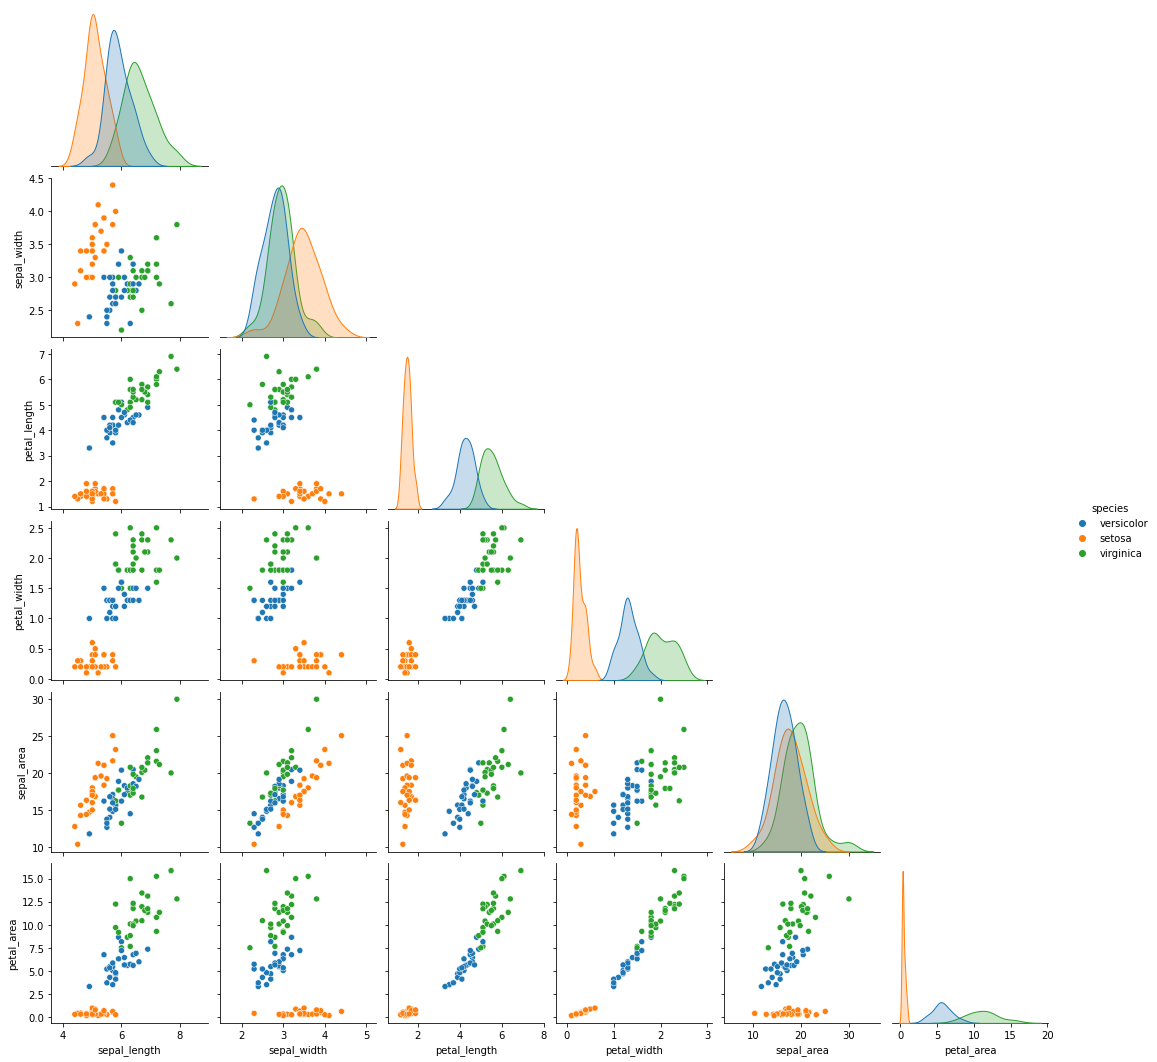

In [23]:
sns.pairplot(train, hue='species', corner=True)
plt.show()

In [24]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]

In [25]:
combos[0]


('sepal_length', 'sepal_width')

In [26]:
train.groupby('species')['sepal_area'].sum()


species
setosa        497.30
versicolor    463.09
virginica     551.46
Name: sepal_area, dtype: float64

In [27]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()


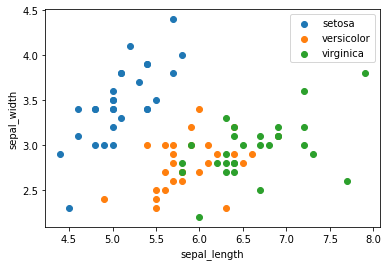

In [28]:
# test it with one plot
scatter_species(x,y)

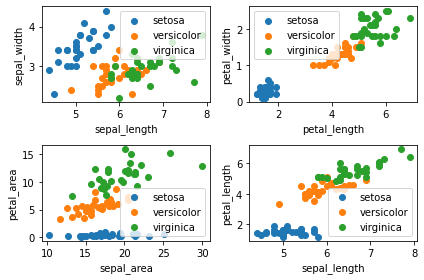

In [29]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()

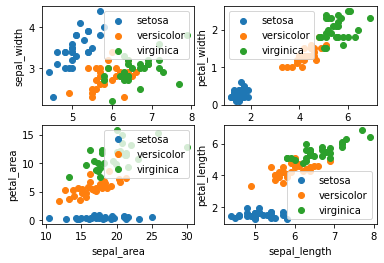

In [30]:
for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])

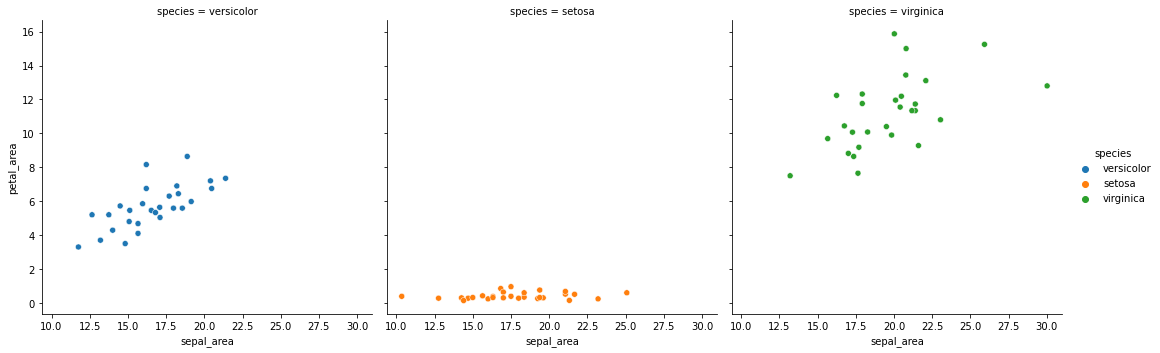

In [33]:
sns.relplot(data=train, x='sepal_area', y='petal_area', kind='scatter', hue='species', col='species')


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

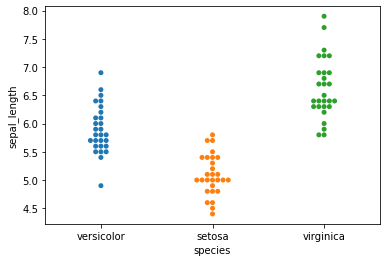

In [34]:
sns.swarmplot(data=train, x='species', y='sepal_length')


In [35]:
train.head()


,species,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
79,versicolor,5.7,2.6,3.5,1.0,14.82,3.50
36,setosa,5.5,3.5,1.3,0.2,19.25,0.26
133,virginica,6.3,2.8,5.1,1.5,17.64,7.65
95,versicolor,5.7,3.0,4.2,1.2,17.10,5.04
18,setosa,5.7,3.8,1.7,0.3,21.66,0.51


In [36]:
train_melt = train.melt(id_vars = 'species')


In [37]:
train_melt.head()


,species,variable,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


<AxesSubplot:xlabel='variable', ylabel='value'>

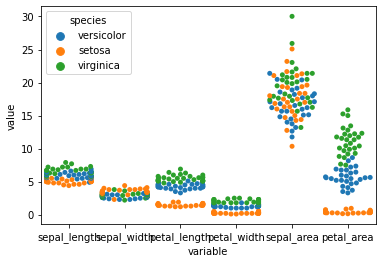

In [38]:
sns.swarmplot(data=train_melt, x='variable', y='value', hue='species')


In [39]:
train.corr()


,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,0.299920,0.982404
sepal_area,0.619853,0.673554,0.271618,0.299920,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,0.373870,1.000000


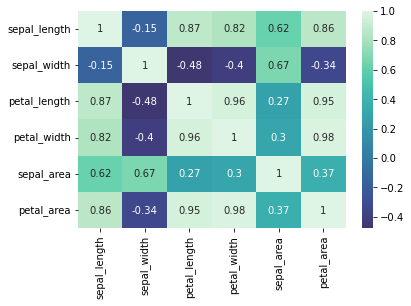

In [40]:
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show()

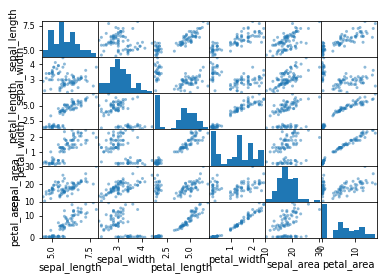

In [41]:
pd.plotting.scatter_matrix(train)
plt.show()

In [42]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       84 non-null     object 
 1   sepal_length  84 non-null     float64
 2   sepal_width   84 non-null     float64
 3   petal_length  84 non-null     float64
 4   petal_width   84 non-null     float64
 5   sepal_area    84 non-null     float64
 6   petal_area    84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 7.3+ KB


**Hypothesis**

- alpha = .05

- $H_0$: Sepal length is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.  

- $H_a$: Sepal length significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$. 

In [44]:
virginica = train[train['species'] == 'virginica']
versicolor = train[train['species'] == 'versicolor']

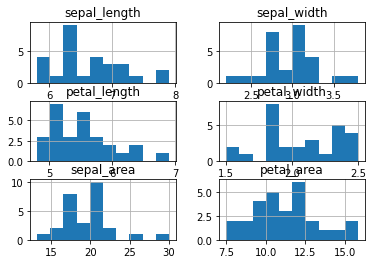

In [45]:
virginica.hist()
plt.show()

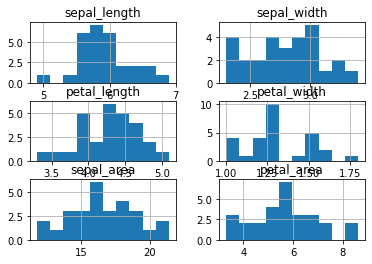

In [46]:
versicolor.hist()
plt.show()

In [47]:
virginica.describe()['sepal_length']['std']

0.5323776159136727

In [48]:
versicolor.describe()['sepal_length']

count    28.000000
mean      5.896429
std       0.425556
min       4.900000
25%       5.600000
50%       5.800000
75%       6.125000
max       6.900000
Name: sepal_length, dtype: float64

In [49]:
import scipy.stats as stats

In [50]:
tstat, p = stats.ttest_ind(virginica.sepal_length,
                versicolor.sepal_length, 
                equal_var=False
               )

In [51]:
tstat

5.656491804882077

In [52]:
p

6.856736413800083e-07

**Conclusion** 

- We reject $H_0$ that the sepal length is the same for both groups.

**Takeaway**

- Sepal length will be a useful feature. 

What about sepal_width? Let's use the Mann-Whitney test for demo purposes. 

**Hypothesis**

- alpha = .05
for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X.


- $H_0$: For randomly selected values of sepal width, the probability of sepal width for virginica being greater than the sepal width for versicolor is equal to the probability of sepal width for versicolor being greater than the sepal width for virginica.

        p(virginica > versicolor) == p(versicolor > virginica)

- $H_a$: The probability of randomly selected values being larger than each other by class is not equal. $\mu_{virginica} != \mu_{versicolor}$. 

In [53]:
stats.mannwhitneyu(virginica.sepal_width, 
                   versicolor.sepal_width
                  )

MannwhitneyuResult(statistic=510.0, pvalue=0.05257259139845694)

**Conclusion**

We reject $H_0$ that the sepal width is the same! 

**Takeaway**

Sepal width, while not the strongest indicator, is still useful. 

# Titanic 

In [ ]:
df = acquire.get_titanic_data()

train, validate, test = prepare.prep_titanic_data(df)

In [ ]:
train

# Determine drivers

being alone and age 

In [ ]:
#drop uneccessary columns
train_new = train.drop(columns=['alone','sex_male','embark_town_Queenstown','embark_town_Southampton'])

train_new

In [ ]:
#combine sibsp and parch columns
train_new['family_count'] = train_new['sibsp']+train_new['parch']
train_new


In [ ]:
#drop sibsp and parch
train_stats = train_new.drop(columns=['sibsp','parch'])

train_stats

In [ ]:
observed = pd.crosstab(train_stats['survived'], train_stats['family_count'])
observed

In [ ]:

df.plot.scatter(y='train_stats.survived', x='train_stats.family_count')

In [ ]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

# Determine if it would be valuable to bin some numeric columns

I would bin the family count and age 

# Determine if it would be valuable to combine multiple columns into one.

combine sibsp and parch


# Telco

In [ ]:
df = acquire.new_telco_data()

train, validate, test = prepare.prep_telco_data(df)

In [ ]:
train